In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_curve,auc, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [9]:
student_performance=pd.read_csv('Student_Performance.csv')

student_performance

,Student_ID,Time_Spent_On_App,Past_Grades,attendance_rate,time_spent_on_quiz,question_attemted,pass_fail,topic_difficulty,future_score
0,1,0.087239,70,89,3.872776,22,Pass,Low,90.898301
1,2,7.255753,15,61,0.133803,41,Fail,High,64.262480
2,3,6.781640,80,64,3.359422,41,Pass,Low,96.324858
3,4,3.503155,94,65,4.227397,12,Pass,Low,100.398639
4,5,1.282587,56,80,3.855772,28,Pass,Medium,83.411253
...,...,...,...,...,...,...,...,...,...
4995,4996,2.957194,31,79,2.225866,23,Fail,High,76.329703
4996,4997,1.663244,22,75,0.200699,28,Fail,High,75.110318
4997,4998,3.457798,30,62,0.366396,5,Fail,High,71.941076
4998,4999,1.272101,42,80,1.994229,47,Pass,Medium,82.235527


In [10]:
label_encode={}
categorical_col=['pass_fail','topic_difficulty']

for col in categorical_col:
    label=LabelEncoder()
    student_performance[col]=label.fit_transform(student_performance[col])
    label_encode[col]=label

In [11]:
X=student_performance.drop(columns=['future_score'])
y=student_performance['future_score']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {rf.score(X, y)}')
pred_y = rf.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.9468181559480615
Accuracy: 94.69%
R2 score : 0.8260785429715327
RMSE: 5.31
MSE :  28.19


In [14]:
tree=DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {tree.score(X, y)}')
pred_y = tree.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.9325308455052961
Accuracy: 92.58%
R2 score : 0.6600092480394646
RMSE: 7.42
MSE :  55.11


In [15]:
lr=LinearRegression()
lr.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {lr.score(X, y)}')
pred_y = lr.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.8487567905878973
Accuracy: 94.98%
R2 score : 0.8444493928459137
RMSE: 5.02
MSE :  25.21


In [16]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {gbr.score(X, y)}')
pred_y = gbr.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.8616435923242259
Accuracy: 94.91%
R2 score : 0.8398992699231864
RMSE: 5.09
MSE :  25.95


In [17]:
lasso=Lasso(random_state=42)
lasso.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {lasso.score(X, y)}')
pred_y = lasso.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.8483822526592744
Accuracy: 94.98%
R2 score : 0.8445504305903123
RMSE: 5.02
MSE :  25.20


In [18]:
ridge=Ridge(random_state=42)
ridge.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {ridge.score(X, y)}')
pred_y = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.848757331032814
Accuracy: 94.98%
R2 score : 0.844452132041916
RMSE: 5.02
MSE :  25.21


In [19]:
svr=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {svr.score(X, y)}')
pred_y = svr.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.8014996342577796
Accuracy: 87.27%
R2 score : -3.77342860680141e-05
RMSE: 12.73
MSE :  162.11


In [20]:
pca = PCA(n_components=5) 
regression = LinearRegression()
pipeline = Pipeline([('pca', pca), ('regression', regression)])

pipeline.fit(X_train, y_train)
print(f'Score : {pipeline.score(X, y)}')
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')

Score : 0.8484543164475251
Accuracy: 94.98%
R2 score : 0.8446827668903187
RMSE: 5.02
MSE :  25.18


In [21]:
elc=ElasticNet(random_state=42)
elc.fit(X_train, y_train)
print('\n Model training complete')

print(f'Score : {elc.score(X, y)}')
pred_y = elc.predict(X_test)

mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
accuracy = 100 - rmse
R2=r2_score(y_test, pred_y)

print(f"Accuracy: {accuracy:.2f}%")
print('R2 score :',R2)
print(f"RMSE: {rmse:.2f}")
print(f'MSE : {mse: .2f}')


 Model training complete
Score : 0.8484217999611675
Accuracy: 94.98%
R2 score : 0.8446057867987307
RMSE: 5.02
MSE :  25.19


In [22]:
import pickle

with open ('model_selected.pkl','wb') as file:
    pickle.dump(rf, file)

with open('encoder.pkl','wb') as file:
    pickle.dump(label_encode, file)

c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


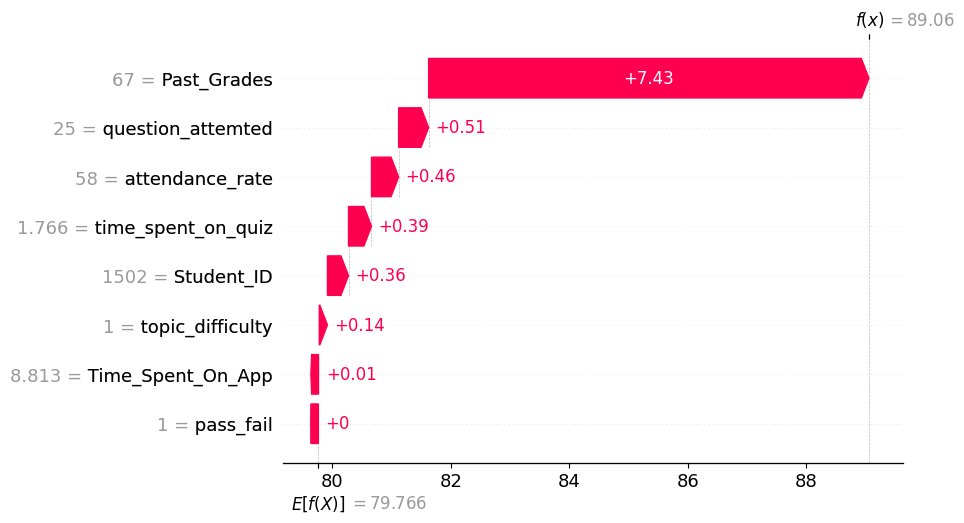

In [23]:
import shap 

model= pickle.load(open('model_selected.pkl', 'rb'))

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

In [24]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [25]:
j = 5
exp = explainer.explain_instance(X_test.values[j], rf.predict, num_features=6)

c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 77.51087685592009
Prediction_local [85.71891225]
Right: 88.54858404289266
